# Sentiment Analysis on Amazon reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
#import all required ;ibraries

import pandas as pd
import numpy as np
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #For stemming
from nltk.stem import WordNetLemmatizer #For Lemmetization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier




In [2]:
df = pd.read_csv('1429_1.csv')
df.head(3)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ


### Exploratory Data Analysis

In [3]:
df.shape

(34660, 21)

In [4]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [6]:
df['reviews.rating'].value_counts()

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

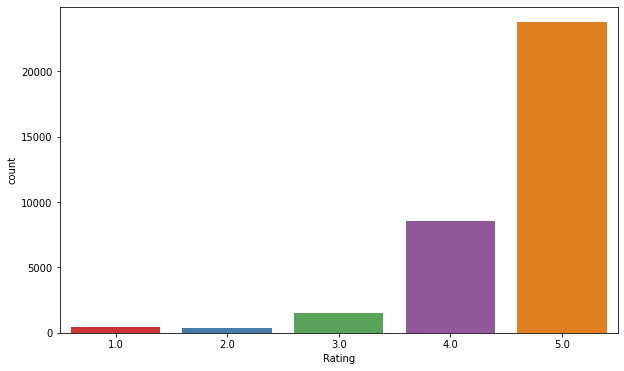

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='reviews.rating', data=df, palette='Set1')
plt.xlabel('Rating')
plt.show()

data = df.copy()
feature_col = data[['reviews.numHelpful','id','name','asins']]
for feature in feature_col:
    plt.figure(figsize=(20,20))
    sns.countplot(x=feature, data=df, palette='Set1') 
    plt.xlabel(feature)
    plt.show()

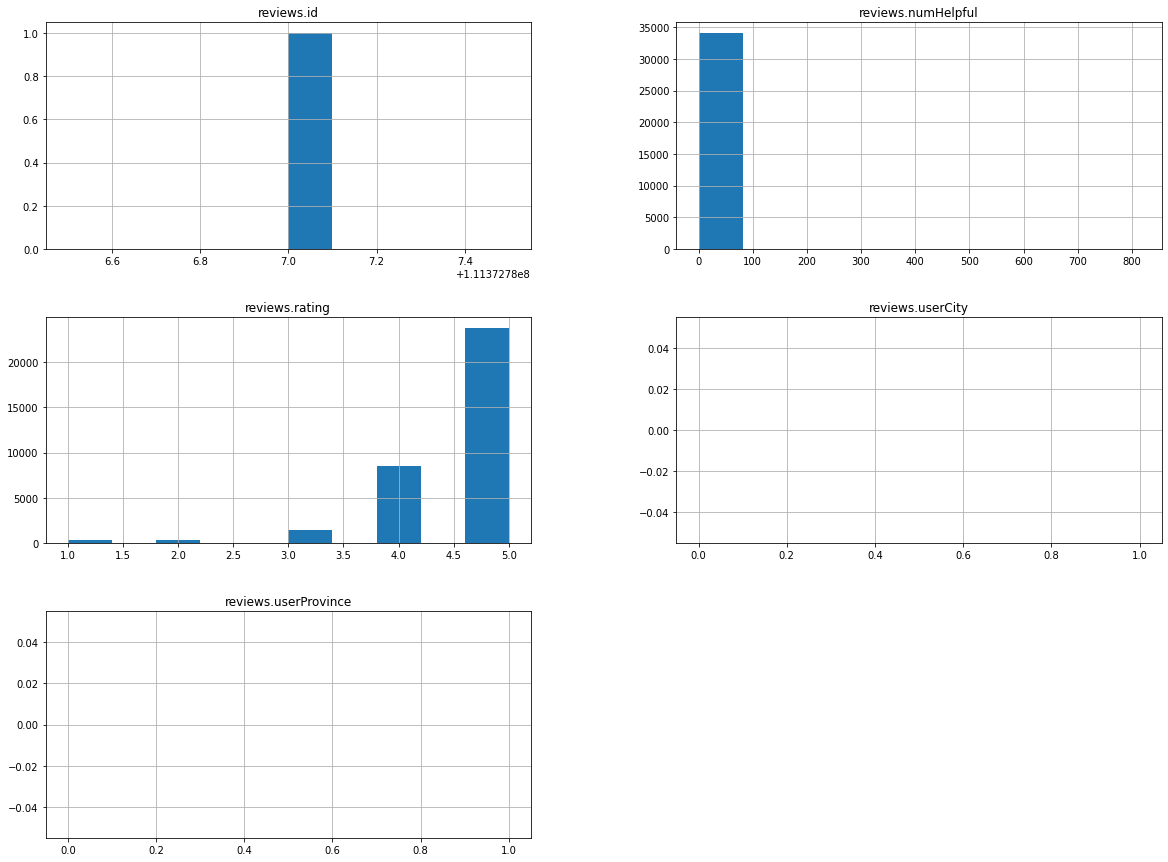

In [8]:
data = df.copy()
data.hist(figsize=(20,15))
plt.show()

In [9]:
data =df.copy()
data['reviews.numHelpful'].value_counts()

0.0      30820
1.0       2049
2.0        562
3.0        190
4.0        122
         ...  
744.0        1
740.0        1
109.0        1
139.0        1
62.0         1
Name: reviews.numHelpful, Length: 97, dtype: int64

In [10]:
df['reviews.didPurchase'].value_counts()

True    1
Name: reviews.didPurchase, dtype: int64

In [11]:
df['reviews.doRecommend'].value_counts()

True     32682
False     1384
Name: reviews.doRecommend, dtype: int64

In [12]:
df['reviews.id'].value_counts()

111372787.0    1
Name: reviews.id, dtype: int64

In [13]:
df['reviews.userCity'].value_counts()

Series([], Name: reviews.userCity, dtype: int64)

In [14]:
df['reviews.userProvince'].value_counts()

Series([], Name: reviews.userProvince, dtype: int64)

In [15]:
df['brand'].value_counts()

Amazon                          28701
Amazon Fire Tv                   5056
Amazon Echo                       636
Amazon Fire                       256
Amazon Digital Services Inc.       10
Amazon Coco T                       1
Name: brand, dtype: int64

In [16]:
df['reviews.username'].value_counts()

Mike           138
Chris           93
John            85
Dave            70
Bill            58
              ... 
NachoCheese      1
wlutz            1
EABIII           1
Rasheik28        1
Satchell         1
Name: reviews.username, Length: 26789, dtype: int64

### asins with rate

In [17]:
asin1 = df[df['asins'] == 'B01AHB9CN2']
df.groupby('asins').agg('count')

,id,name,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
asins,,,,,,,,,,,,,,,,,,,,
B002Y27P3M,19,19,19,19,19,19,11,0,19,0,0,0,0,0,19,19,19,0,0,19
B002Y27P6Y,10,0,10,10,10,10,9,0,10,0,0,0,4,10,10,10,10,0,0,10
B005PB2T0S,5,5,5,5,5,5,4,0,5,0,0,0,5,5,5,5,5,0,0,5
B005PB2T2Q,6,6,6,6,6,6,4,0,6,0,0,0,6,6,6,6,6,0,0,6
B006GWO5NE,8,0,8,8,8,8,6,0,8,0,0,0,0,8,8,8,8,0,0,8
B006GWO5WK,13,0,13,13,13,13,13,0,13,0,0,0,0,13,13,13,13,0,0,13
B0083Q04TA,4,4,4,4,4,4,4,0,4,0,0,0,0,0,4,4,4,0,0,4
B00BFJAHF8,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,1,0,0,1
B00DU15MU4,6,6,6,6,6,6,4,0,6,0,0,0,0,1,6,6,6,0,0,6


In [18]:
df.groupby('reviews.rating').agg('count')

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
reviews.rating,,,,,,,,,,,,,,,,,,,,
1.0,410,326,410,410,410,410,410,410,269,410,0,356,0,375,410,410,410,0,0,410
2.0,402,339,402,402,402,402,402,402,280,402,0,382,0,388,402,402,402,0,0,402
3.0,1499,1289,1499,1499,1499,1499,1499,1499,1081,1499,0,1470,0,1475,1499,1499,1499,0,0,1499
4.0,8541,7220,8540,8541,8541,8541,8541,8531,6191,8541,0,8469,0,8480,8541,8541,8541,0,0,8541
5.0,23775,18694,23774,23775,23775,23775,23775,23756,16218,23775,1,23389,1,23413,23775,23774,23770,0,0,23773


### Data Preprocessing

In [19]:
data = df.copy()
data_new = data.dropna(subset=['reviews.rating'])
len(data_new)

34627

In [20]:
corr_matrix = data.corr() #correlation between columns
corr_matrix

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.id,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.000000,-0.042395,NaN,NaN
reviews.rating,NaN,-0.042395,1.000000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN


In [21]:
for feature in data.columns:
    print('Total unique value in {} is {}'.format(feature, len(data[feature].unique())))

Total unique value in id is 42
Total unique value in name is 49
Total unique value in asins is 42
Total unique value in brand is 6
Total unique value in categories is 41
Total unique value in keys is 42
Total unique value in manufacturer is 2
Total unique value in reviews.date is 1079
Total unique value in reviews.dateAdded is 1942
Total unique value in reviews.dateSeen is 3911
Total unique value in reviews.didPurchase is 2
Total unique value in reviews.doRecommend is 3
Total unique value in reviews.id is 2
Total unique value in reviews.numHelpful is 98
Total unique value in reviews.rating is 6
Total unique value in reviews.sourceURLs is 11929
Total unique value in reviews.text is 34660
Total unique value in reviews.title is 19768
Total unique value in reviews.userCity is 1
Total unique value in reviews.userProvince is 1
Total unique value in reviews.username is 26790


In [22]:
data.head(1)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter


In [23]:
df1 = data[['brand','manufacturer','reviews.doRecommend','reviews.numHelpful','reviews.rating','reviews.text']]

In [24]:
df1.head(3)

,brand,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text
0,Amazon,Amazon,True,0.0,5.0,This product so far has not disappointed. My c...
1,Amazon,Amazon,True,0.0,5.0,great for beginner or experienced person. Boug...
2,Amazon,Amazon,True,0.0,5.0,Inexpensive tablet for him to use and learn on...


In [25]:
d = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
d.head(3)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."


In [26]:
df2 = d[['brand','manufacturer','reviews.doRecommend','reviews.numHelpful','reviews.rating','reviews.text']]

In [27]:
df2.head()

,brand,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text
0,Amazonbasics,AmazonBasics,NaN,NaN,3,I order 3 of them and one of the item is bad q...
1,Amazonbasics,AmazonBasics,NaN,NaN,4,Bulk is always the less expensive way to go fo...
2,Amazonbasics,AmazonBasics,NaN,NaN,5,Well they are not Duracell but for the price i...
3,Amazonbasics,AmazonBasics,NaN,NaN,5,Seem to work as well as name brand batteries a...
4,Amazonbasics,AmazonBasics,NaN,NaN,5,These batteries are very long lasting the pric...


In [28]:
df2.shape

(28332, 6)

In [29]:
 df2['reviews.numHelpful'].value_counts()

0.0      14878
1.0        589
2.0        256
3.0         82
4.0         58
         ...  
47.0         1
621.0        1
55.0         1
45.0         1
220.0        1
Name: reviews.numHelpful, Length: 61, dtype: int64

In [30]:
df2['brand'].value_counts()

Amazon          16153
Amazonbasics    12169
AmazonBasics       10
Name: brand, dtype: int64

In [31]:
df2['manufacturer'].value_counts()

Amazon                     16130
AmazonBasics               12179
Amazon Digital Services       18
Amazon.com                     5
Name: manufacturer, dtype: int64

In [32]:
df2['reviews.doRecommend'].value_counts()

True     15353
False      733
Name: reviews.doRecommend, dtype: int64

In [33]:
df2.isnull().sum()

brand                      0
manufacturer               0
reviews.doRecommend    12246
reviews.numHelpful     12217
reviews.rating             0
reviews.text               0
dtype: int64

In [34]:
df2 = df2.dropna()

In [35]:
df2.isnull().sum()

brand                  0
manufacturer           0
reviews.doRecommend    0
reviews.numHelpful     0
reviews.rating         0
reviews.text           0
dtype: int64

In [36]:
corr_mat = df2.corr()
corr_mat

,reviews.numHelpful,reviews.rating
reviews.numHelpful,1.000000,-0.022648
reviews.rating,-0.022648,1.000000


In [37]:
dd = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
dd.head(3)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...


In [38]:
df3 = dd[['brand','manufacturer','reviews.doRecommend','reviews.numHelpful','reviews.rating','reviews.text']]

In [39]:
df3.head()

,brand,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text
0,Amazon,Amazon,False,0,3,I thought it would be as big as small paper bu...
1,Amazon,Amazon,True,0,5,This kindle is light and easy to use especiall...
2,Amazon,Amazon,True,0,4,Didnt know how much i'd use a kindle so went f...
3,Amazon,Amazon,True,3,5,I am 100 happy with my purchase. I caught it o...
4,Amazon,Amazon,True,0,5,Solid entry level Kindle. Great for kids. Gift...


In [40]:
#for feature in df3.columns:
   # print(df3[feature].value_counts())

In [41]:
df3.shape

(5000, 6)

In [42]:
df3.isnull().sum()

brand                  0
manufacturer           0
reviews.doRecommend    0
reviews.numHelpful     0
reviews.rating         0
reviews.text           0
dtype: int64

### merging all dataset to a single dataset

In [43]:
frame = [df1 , df2]
dataset = pd.concat(frame)

In [44]:
dataset.shape

(50746, 6)

In [45]:
len(df1)+len(df2)

50746

In [46]:
frame = [dataset, df3]
dataset = pd.concat(frame)

In [47]:
dataset.shape

(55746, 6)

In [48]:
dataset.head()

,brand,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text
0,Amazon,Amazon,True,0.0,5.0,This product so far has not disappointed. My c...
1,Amazon,Amazon,True,0.0,5.0,great for beginner or experienced person. Boug...
2,Amazon,Amazon,True,0.0,5.0,Inexpensive tablet for him to use and learn on...
3,Amazon,Amazon,True,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...
4,Amazon,Amazon,True,0.0,5.0,I bought this for my grand daughter when she c...


### Adding sentiment columns to the datasets

In [49]:
temp_data = dataset.copy()

In [50]:
temp_data['sentiment'] = temp_data["reviews.rating"].apply(lambda score: "positive" if score > 3 else \
                                              ("negative" if score < 3 else "intermediate"))

In [51]:
temp_data.head()

,brand,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,sentiment
0,Amazon,Amazon,True,0.0,5.0,This product so far has not disappointed. My c...,positive
1,Amazon,Amazon,True,0.0,5.0,great for beginner or experienced person. Boug...,positive
2,Amazon,Amazon,True,0.0,5.0,Inexpensive tablet for him to use and learn on...,positive
3,Amazon,Amazon,True,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,positive
4,Amazon,Amazon,True,0.0,5.0,I bought this for my grand daughter when she c...,positive


In [52]:
temp_data[temp_data['reviews.rating']==3]

,brand,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,sentiment
222,Amazon,Amazon,False,0.0,3.0,I was hoping to use Google launcher with this ...,intermediate
226,Amazon,Amazon,False,0.0,3.0,The tablet works fine. It is responsive with g...,intermediate
298,Amazon,Amazon,True,0.0,3.0,"Fine for reading, ...haven't used it for anyth...",intermediate
354,Amazon,Amazon,True,0.0,3.0,Though I have got it for cheap price during bl...,intermediate
371,Amazon,Amazon,True,0.0,3.0,"This is a good product for video, surfing and ...",intermediate
...,...,...,...,...,...,...,...
4807,Amazon,Amazon,False,0.0,3.0,meh. it works. i find it difficult to navigate...,intermediate
4842,Amazon,Amazon,True,0.0,3.0,Decent little tablet if you are not a game pla...,intermediate
4880,Amazon,Amazon,False,0.0,3.0,I bought this as a Christmas gift for my wife ...,intermediate
4945,Amazon,Amazon,True,0.0,3.0,My daughter has had this tablet for almost 2 m...,intermediate


In [53]:
temp_data[temp_data['reviews.rating']==1]

,brand,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,sentiment
126,Amazon,Amazon,False,2.0,1.0,i Bought this around black friday for $60 hopi...,negative
169,Amazon,Amazon,False,2.0,1.0,I bought this tablet for my 4 year old daughte...,negative
241,Amazon,Amazon,False,0.0,1.0,Didn't want to go to the sites amazon wanted m...,negative
297,Amazon,Amazon,False,0.0,1.0,This Kindle is so overloaded with apps that I ...,negative
310,Amazon,Amazon,False,0.0,1.0,I liked it at first except the browser is kind...,negative
...,...,...,...,...,...,...,...
4761,Amazon,Amazon,False,2.0,1.0,The last 2 models of Kindle HDX 8 have been te...,negative
4795,Amazon,Amazon,False,1.0,1.0,This is not an upgrade by any means! My three ...,negative
4823,Amazon,Amazon,False,0.0,1.0,Bought this mostly as a backup.and to read a f...,negative
4865,Amazon,Amazon,False,2.0,1.0,The last 2 models of Kindle HDX 8 have been te...,negative


In [54]:
temp_data[temp_data['reviews.rating']==2]

,brand,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,sentiment
117,Amazon,Amazon,True,0.0,2.0,Didn't have some of the features I was looking...,negative
281,Amazon,Amazon,False,0.0,2.0,Not a good product short battery life i can on...,negative
444,Amazon,Amazon,False,0.0,2.0,"If you shop on Amazon all the time, this will ...",negative
446,Amazon,Amazon,True,0.0,2.0,fire tablet is very powerful for the size and ...,negative
635,Amazon,Amazon,False,0.0,2.0,I have always gone to buy a kindle because I l...,negative
...,...,...,...,...,...,...,...
4264,Amazon,Amazon,False,0.0,2.0,"Hard to use, Lots of ads, and Randomly closes ...",negative
4287,Amazon,Amazon,False,0.0,2.0,Loved my husbands 4th generation disappointed ...,negative
4510,Amazon,Amazon,False,0.0,2.0,Loved my husbands 4th generation disappointed ...,negative
4904,Amazon,Amazon,False,0.0,2.0,The battery is having more and more trouble ho...,negative


In [55]:
temp_data.shape

(55746, 7)

In [56]:
temp_data[temp_data['brand'] == temp_data['manufacturer']]

,brand,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,sentiment
0,Amazon,Amazon,True,0.0,5.0,This product so far has not disappointed. My c...,positive
1,Amazon,Amazon,True,0.0,5.0,great for beginner or experienced person. Boug...,positive
2,Amazon,Amazon,True,0.0,5.0,Inexpensive tablet for him to use and learn on...,positive
3,Amazon,Amazon,True,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,positive
4,Amazon,Amazon,True,0.0,5.0,I bought this for my grand daughter when she c...,positive
...,...,...,...,...,...,...,...
4995,Amazon,Amazon,True,0.0,5.0,This is a great tablet for the price. Amazon i...,positive
4996,Amazon,Amazon,True,1.0,5.0,This tablet is the perfect size and so easy to...,positive
4997,Amazon,Amazon,True,8.0,4.0,Purchased this for my son. Has room to upgrade...,positive
4998,Amazon,Amazon,True,0.0,5.0,I had some thoughts about getting this for a 5...,positive


In [57]:
len(temp_data[temp_data['brand'] == temp_data['manufacturer']])/len(temp_data)

0.8927277293438094

In [58]:
temp_data = temp_data[temp_data['brand'] == temp_data['manufacturer']]

In [59]:
temp_data.shape

(49766, 7)

In [60]:
temp_data = temp_data.drop(['manufacturer'] , axis = 'columns')

In [61]:
temp_data.head()

,brand,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,sentiment
0,Amazon,True,0.0,5.0,This product so far has not disappointed. My c...,positive
1,Amazon,True,0.0,5.0,great for beginner or experienced person. Boug...,positive
2,Amazon,True,0.0,5.0,Inexpensive tablet for him to use and learn on...,positive
3,Amazon,True,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,positive
4,Amazon,True,0.0,5.0,I bought this for my grand daughter when she c...,positive


In [62]:
temp_data['DoRecommend'] = temp_data["reviews.doRecommend"].apply(lambda x: 1 if True else 0)
                                              

In [63]:
temp_data[temp_data['DoRecommend'] == 1]

,brand,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,sentiment,DoRecommend
0,Amazon,True,0.0,5.0,This product so far has not disappointed. My c...,positive,1
1,Amazon,True,0.0,5.0,great for beginner or experienced person. Boug...,positive,1
2,Amazon,True,0.0,5.0,Inexpensive tablet for him to use and learn on...,positive,1
3,Amazon,True,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,positive,1
4,Amazon,True,0.0,5.0,I bought this for my grand daughter when she c...,positive,1
...,...,...,...,...,...,...,...
4995,Amazon,True,0.0,5.0,This is a great tablet for the price. Amazon i...,positive,1
4996,Amazon,True,1.0,5.0,This tablet is the perfect size and so easy to...,positive,1
4997,Amazon,True,8.0,4.0,Purchased this for my son. Has room to upgrade...,positive,1
4998,Amazon,True,0.0,5.0,I had some thoughts about getting this for a 5...,positive,1


In [64]:
temp_data['reviews.doRecommend'].value_counts()

True     47067
False     2145
Name: reviews.doRecommend, dtype: int64

In [65]:
temp_data.drop(['DoRecommend'], axis = 'columns', inplace = True)

In [66]:
temp_data.head(3)

,brand,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,sentiment
0,Amazon,True,0.0,5.0,This product so far has not disappointed. My c...,positive
1,Amazon,True,0.0,5.0,great for beginner or experienced person. Boug...,positive
2,Amazon,True,0.0,5.0,Inexpensive tablet for him to use and learn on...,positive


In [67]:
temp_data1 = dataset.copy()

In [68]:
temp_data1.head(3)

,brand,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text
0,Amazon,Amazon,True,0.0,5.0,This product so far has not disappointed. My c...
1,Amazon,Amazon,True,0.0,5.0,great for beginner or experienced person. Boug...
2,Amazon,Amazon,True,0.0,5.0,Inexpensive tablet for him to use and learn on...


In [69]:
temp_data1 = temp_data1[temp_data1['brand'] == temp_data1['manufacturer']]

In [70]:
temp_data1.shape

(49766, 6)

In [71]:
temp_data1 = temp_data1.drop(['manufacturer'] , axis = 'columns')

In [72]:
temp_data1.head(3)

,brand,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text
0,Amazon,True,0.0,5.0,This product so far has not disappointed. My c...
1,Amazon,True,0.0,5.0,great for beginner or experienced person. Boug...
2,Amazon,True,0.0,5.0,Inexpensive tablet for him to use and learn on...


In [73]:
temp_data['sentiment'] = temp_data["reviews.rating"].apply(lambda score: 1 if score > 3 else \
                                              (0 if score < 3 else 2))

##### Here, 1 for positive, 2 for Neutral and 0 for negative 

In [74]:
pd.pandas.set_option('display.max_rows',None)

In [75]:
temp_data.groupby('sentiment').agg('count')

,brand,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text
sentiment,,,,,
0,1231,1168,1191,1231,1231
1,46329,45896,45922,46329,46328
2,2206,2148,2152,2174,2206


In [76]:
temp_data.shape

(49766, 6)

In [77]:
temp_data.isnull().sum()

brand                    0
reviews.doRecommend    554
reviews.numHelpful     501
reviews.rating          32
reviews.text             1
sentiment                0
dtype: int64

In [78]:
temp_data = temp_data.dropna()

In [79]:
temp_data.isnull().sum()

brand                  0
reviews.doRecommend    0
reviews.numHelpful     0
reviews.rating         0
reviews.text           0
sentiment              0
dtype: int64

In [80]:
temp_data.shape

(49210, 6)

In [81]:
temp_data.groupby('sentiment').agg('count')

,brand,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text
sentiment,,,,,
0,1168,1168,1168,1168,1168
1,45894,45894,45894,45894,45894
2,2148,2148,2148,2148,2148


In [82]:
temp_data.head(3)

,brand,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,sentiment
0,Amazon,True,0.0,5.0,This product so far has not disappointed. My c...,1
1,Amazon,True,0.0,5.0,great for beginner or experienced person. Boug...,1
2,Amazon,True,0.0,5.0,Inexpensive tablet for him to use and learn on...,1


In [83]:
dummies1 = pd.get_dummies(temp_data['reviews.doRecommend'],prefix='doRecommend')

In [84]:
dummies1.head(10)

,doRecommend_False,doRecommend_True
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [85]:
temp_data.groupby('brand').agg('count')

,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,sentiment
brand,,,,,
Amazon,49210,49210,49210,49210,49210


In [86]:
temp_data = pd.concat([temp_data,dummies1.drop('doRecommend_False',axis='columns')],axis='columns')

In [87]:
temp_data.head()

,brand,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,sentiment,doRecommend_True
0,Amazon,True,0.0,5.0,This product so far has not disappointed. My c...,1,1
1,Amazon,True,0.0,5.0,great for beginner or experienced person. Boug...,1,1
2,Amazon,True,0.0,5.0,Inexpensive tablet for him to use and learn on...,1,1
3,Amazon,True,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,1,1
4,Amazon,True,0.0,5.0,I bought this for my grand daughter when she c...,1,1


In [88]:
temp_data2 = temp_data.drop(['brand','reviews.doRecommend'], axis = 'columns')

In [89]:
temp_data2.head()

,reviews.numHelpful,reviews.rating,reviews.text,sentiment,doRecommend_True
0,0.0,5.0,This product so far has not disappointed. My c...,1,1
1,0.0,5.0,great for beginner or experienced person. Boug...,1,1
2,0.0,5.0,Inexpensive tablet for him to use and learn on...,1,1
3,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,1,1
4,0.0,5.0,I bought this for my grand daughter when she c...,1,1


Now our task is to classify our dataset['reviews.text'] into positive, negative and neutral i.e 1,0,2 respectively 

In [90]:
temp_data2_pos = temp_data2[temp_data2["sentiment"].isin([1])]
temp_data2_neg = temp_data2[temp_data2["sentiment"].isin([0])]
temp_data2_neutral = temp_data2[temp_data2["sentiment"].isin([2])]

In [91]:
temp_data2_pos.head()

,reviews.numHelpful,reviews.rating,reviews.text,sentiment,doRecommend_True
0,0.0,5.0,This product so far has not disappointed. My c...,1,1
1,0.0,5.0,great for beginner or experienced person. Boug...,1,1
2,0.0,5.0,Inexpensive tablet for him to use and learn on...,1,1
3,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,1,1
4,0.0,5.0,I bought this for my grand daughter when she c...,1,1


In [92]:
temp_data2_neg.head()

,reviews.numHelpful,reviews.rating,reviews.text,sentiment,doRecommend_True
117,0.0,2.0,Didn't have some of the features I was looking...,0,1
126,2.0,1.0,i Bought this around black friday for $60 hopi...,0,0
169,2.0,1.0,I bought this tablet for my 4 year old daughte...,0,0
241,0.0,1.0,Didn't want to go to the sites amazon wanted m...,0,0
281,0.0,2.0,Not a good product short battery life i can on...,0,0


In [93]:
temp_data2_neutral.head()

,reviews.numHelpful,reviews.rating,reviews.text,sentiment,doRecommend_True
222,0.0,3.0,I was hoping to use Google launcher with this ...,2,0
226,0.0,3.0,The tablet works fine. It is responsive with g...,2,0
298,0.0,3.0,"Fine for reading, ...haven't used it for anyth...",2,1
354,0.0,3.0,Though I have got it for cheap price during bl...,2,1
371,0.0,3.0,"This is a good product for video, surfing and ...",2,1


In [94]:
temp_data_final = pd.concat([temp_data2_pos, temp_data2_neg, temp_data2_neutral])

In [95]:
temp_data_final.shape

(49210, 5)

In [96]:
temp_data2_neutral.shape

(2148, 5)

In [97]:
temp_data2_pos.shape

(45894, 5)

In [98]:
temp_data2_neg.shape

(1168, 5)

In [99]:
temp_data_final.head()

,reviews.numHelpful,reviews.rating,reviews.text,sentiment,doRecommend_True
0,0.0,5.0,This product so far has not disappointed. My c...,1,1
1,0.0,5.0,great for beginner or experienced person. Boug...,1,1
2,0.0,5.0,Inexpensive tablet for him to use and learn on...,1,1
3,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,1,1
4,0.0,5.0,I bought this for my grand daughter when she c...,1,1


In [100]:
temp_data_final.tail()

,reviews.numHelpful,reviews.rating,reviews.text,sentiment,doRecommend_True
4807,0.0,3.0,meh. it works. i find it difficult to navigate...,2,0
4842,0.0,3.0,Decent little tablet if you are not a game pla...,2,1
4880,0.0,3.0,I bought this as a Christmas gift for my wife ...,2,0
4945,0.0,3.0,My daughter has had this tablet for almost 2 m...,2,1
4975,0.0,3.0,I wish it has some more of the apps from the p...,2,1


In [101]:
#temp_data_final.head(45900)ad

In [102]:
temp_data_final.sentiment.value_counts()

1    45894
2     2148
0     1168
Name: sentiment, dtype: int64

In [103]:
temp_data_final.head()

,reviews.numHelpful,reviews.rating,reviews.text,sentiment,doRecommend_True
0,0.0,5.0,This product so far has not disappointed. My c...,1,1
1,0.0,5.0,great for beginner or experienced person. Boug...,1,1
2,0.0,5.0,Inexpensive tablet for him to use and learn on...,1,1
3,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,1,1
4,0.0,5.0,I bought this for my grand daughter when she c...,1,1


### split the data into train/test

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_data_final['reviews.text'], temp_data_final['sentiment'], test_size = 0.2)

In [105]:
X_train.head()

27777    The sound is good, worth a try. The minus thin...
18533    This is the right size to carry around. Really...
3945     Very good tablet for the price economical and ...
4319     Using the Kindle to read books and stream vide...
17285    Didn't want to go to the sites amazon wanted m...
Name: reviews.text, dtype: object

In [106]:
y_train.head()

27777    1
18533    1
3945     1
4319     1
17285    0
Name: sentiment, dtype: int64

# DOING NLP

In [170]:
temp_data_final['liked'] = np.where(temp_data_final['reviews.rating'] == 5, 1,0)



In [171]:
temp_data_final.head()

,reviews.numHelpful,reviews.rating,reviews.text,sentiment,doRecommend_True,liked
0,0.0,5.0,This product so far has not disappointed. My c...,1,1,1
1,0.0,5.0,great for beginner or experienced person. Boug...,1,1,1
2,0.0,5.0,Inexpensive tablet for him to use and learn on...,1,1,1
3,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,1,1,0
4,0.0,5.0,I bought this for my grand daughter when she c...,1,1,1


In [172]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(temp_data_final['reviews.text'],temp_data_final.liked,test_size=0.3,random_state=42)

In [173]:
#initiliaze Countvecorizer
vi = CountVectorizer(max_features=2000)

X_train2_v=vi.fit_transform(X_train2)

X_test2_v=vi.transform(X_test2)




In [174]:
from sklearn.svm import LinearSVC
model_final = LinearSVC()
model_final.fit(X_train2_v,y_train2)



/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [195]:
rev=['this product is not working']
rev_vec=vi.transform(rev)
model_final.predict(rev_vec)

array([0])

In [191]:
model_final.score(X_test_v,y_test2)

0.7661721872248188

In [196]:
#Save the model pickle file to be used for prediction
pickle.dump(model1,open('model_final.pkl','wb'))

In [197]:
words = vi.get_feature_names()
pickle.dump(words,open('vocabulary.pkl','wb'))

In [109]:
zip=pd.DataFrame(temp_data_final['reviews.text'])
zip.head()

,reviews.text
0,This product so far has not disappointed. My c...
1,great for beginner or experienced person. Boug...
2,Inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...
4,I bought this for my grand daughter when she c...


In [110]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elcinyutes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
#get the stopwords for english
stopWords = stopwords.words('english')



In [112]:
#remove no and not from list of stopwords
stopWords.remove('no')
stopWords.remove('not')



In [113]:
#Create objects of stemmer and lemmatizer
stem_obj = PorterStemmer()
lem_obj = WordNetLemmatizer()


corpus = []



In [114]:
#Text Preprocessing including stemming
import nltk
nltk.download('wordnet')
    
#Text Preprocessing without stemming    
for i in range(0,len(zip)):
    review = re.sub('[^a-zA-Z]',' ',zip.iloc[i,0]) #remove all characters except A-Z
    review = review.lower().split() #convert all text into lower case and split by space
    
    #Apply stemming and lemmatization of all words in review
    review_updated = [lem_obj.lemmatize(lem_obj.lemmatize(word,pos='v'),pos='a')\
                     for word in review\
                     if word not in stopWords]
    review_updated = ' '.join(review_updated)
    corpus.append(review_updated)
    
    



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/elcinyutes/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [115]:
#initiliaze Countvecorizer
countVector = CountVectorizer(max_features=2000)




In [116]:
#Save the Count Vector as tranform.pkl file 
#which will be used to convert text into count vector
pickle.dump(countVector,open('transform.pkl','wb'))

X = countVector.fit_transform(corpus).toarray()
X



array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [117]:
#Save the vocabulary in form of words
words = countVector.get_feature_names()
pickle.dump(words,open('vocabulary.pkl','wb'))




In [118]:
#X = countVector.fit_transform(corpus)
y = temp_data_final.iloc[:,3].values

y


array([1, 1, 1, ..., 2, 2, 2])

In [119]:
#split the dataset into train and test
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=42) 




In [120]:
from sklearn.svm import LinearSVC
model1 = LinearSVC()
model1.fit(X_train1,y_train1)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [121]:
model1.score(X_test1,y_test1)

0.9453363137573664

In [122]:
model1.predict(X_test1)

array([1, 1, 1, ..., 1, 1, 1])

In [123]:
#Save the model pickle file to be used for prediction
pickle.dump(model1,open('nlp_model.pkl','wb'))

# END

## CountVectorizer

In [124]:
from sklearn.feature_extraction.text import CountVectorizer

In [125]:
count_vector=CountVectorizer(stop_words="english")

In [126]:
count_vector.fit(X_train)

CountVectorizer(stop_words='english')

In [127]:
X_train_new = count_vector.transform(X_train)

In [128]:
X_train_new.shape

(39368, 11855)

In [129]:
X_test_new = count_vector.transform(X_test)

In [130]:
y_test.describe()

count    9842.000000
mean        1.021134
std         0.255337
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: sentiment, dtype: float64

In [131]:
from sklearn.svm import LinearSVC
model = LinearSVC()

In [132]:
model.fit(X_train_new,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [133]:
model.predict(X_test_new)

array([1, 1, 1, ..., 1, 1, 1])

In [134]:
model.score(X_test_new, y_test)

0.9536679536679536

In [135]:
count_vector2 = CountVectorizer(stop_words="english")

In [136]:
X_train_new

<39368x11855 sparse matrix of type '<class 'numpy.int64'>'
	with 497551 stored elements in Compressed Sparse Row format>

In [137]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, model.predict(X_test_new))
cfm

array([[ 124,   81,   14],
       [  16, 9083,   97],
       [  19,  229,  179]])

In [138]:
model.score(X_test_new, y_test)

0.9536679536679536

Text(69.0, 0.5, 'Truth')

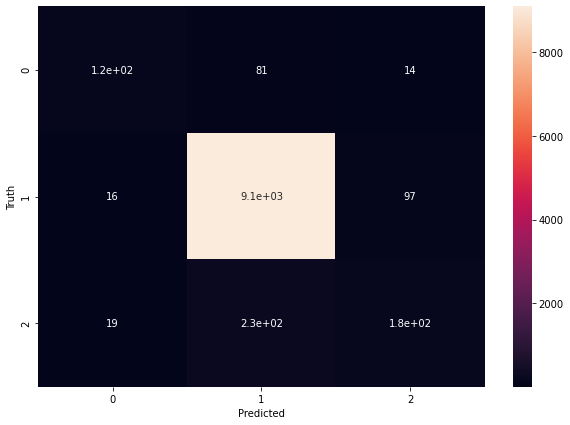

In [139]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cfm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [140]:
X = count_vector.transform(temp_data_final['reviews.text'])
y = temp_data_final['sentiment']

In [141]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits =5, test_size=0.2, random_state=11)
cross_val_score(LinearSVC(),X,y,cv=cv)

array([0.95295672, 0.95153424, 0.95204227, 0.95295672, 0.95366795])

In [142]:
temp_data_final.head(3)

,reviews.numHelpful,reviews.rating,reviews.text,sentiment,doRecommend_True,liked
0,0.0,5.0,This product so far has not disappointed. My c...,1,1,1
1,0.0,5.0,great for beginner or experienced person. Boug...,1,1,1
2,0.0,5.0,Inexpensive tablet for him to use and learn on...,1,1,1


In [143]:
data11 = temp_data_final.sample(frac=0.2)
print(len(data11))
data11.head()

9842


,reviews.numHelpful,reviews.rating,reviews.text,sentiment,doRecommend_True,liked
25041,0.0,5.0,Great tablet for a toddler to start on! The pa...,1,1,1
12731,1.0,5.0,"Excellent speaker, love the portability and lo...",1,1,1
26929,0.0,4.0,The quality of the speaker is better than I ex...,1,1,1
23170,0.0,5.0,Easy to play and very helpful to learning for ...,1,1,1
26873,0.0,5.0,Very easy to use. Good to use at parties and e...,1,1,1


In [144]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/elcinyutes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [145]:
from nltk import word_tokenize
from gensim.models import word2vec
target = data11['sentiment']
data_value = data11['reviews.text'].map(word_tokenize).values

/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [146]:

total_vocabulary = set(word for headline in data_value for word in headline)
len(total_vocabulary)
print('There are {} unique tokens in the dataset.'.format(len(total_vocabulary)))

There are 10030 unique tokens in the dataset.


In [147]:
glove = {}
with open('C:\\Users\\Varadharajan Palani\\Downloads\\glove\\glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocabulary:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Varadharajan Palani\\Downloads\\glove\\glove.6B.50d.txt'

In [ ]:
glove['review']

In [ ]:
class W2vVectorizer(object):

    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])

    # Note: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # it can't be used in a scikit-learn pipeline  
    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

In [ ]:
from sklearn.pipeline import Pipeline
linear_svc = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
                ('Support Vector Machine', LinearSVC())])

In [ ]:
models = [('Support Vector Machine', linear_svc)]
          

In [ ]:
scores = [(name, cross_val_score(model, data_value, target, cv=2).mean()) for name, model, in models]

In [ ]:
scores